In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt

In [116]:
df = pd.read_csv('Acc teht3.csv',delimiter=";", decimal=',')
df = df.rename(columns={"Time (s)":"time","Linear Acceleration x (m/s^2)":"ax", "Linear Acceleration y (m/s^2)":"ay","Linear Acceleration z (m/s^2)":"az","Absolute acceleration (m/s^2)":"a_tot" })

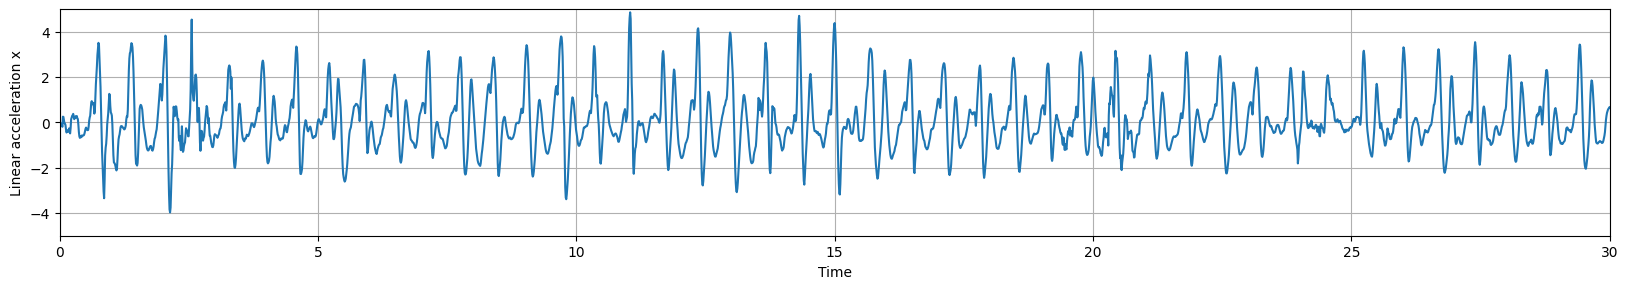

In [130]:
fig = plt.figure(num=None, figsize= (20, 10),dpi=100, facecolor='w', edgecolor='k')


plt.subplot(3,1,3)
plt.plot(df.time,df.az)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Linear acceleration x')
plt.axis([0,30,-5,5])

plt.show()

In [87]:
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [145]:
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [149]:
T = df['time'].max() - df['time'].min()           
n = int(len(df))
fs = n / T               
cutoff = 1/(40)
cutoff2 = 1/(5) 
nyq = 0.5 * fs                 
order = 1               
    

In [150]:
df_f = butter_lowpass_filter(df['az'], cutoff, fs, nyq, order)
df_f2 = butter_highpass_filter(df['az'], cutoff2, fs, nyq, order)

clean_signal = df['az'] - df_f2 - df_f

Text(0.5, 1.0, 'Alipäästösuodatettu signaali (tausta/nollataso)')

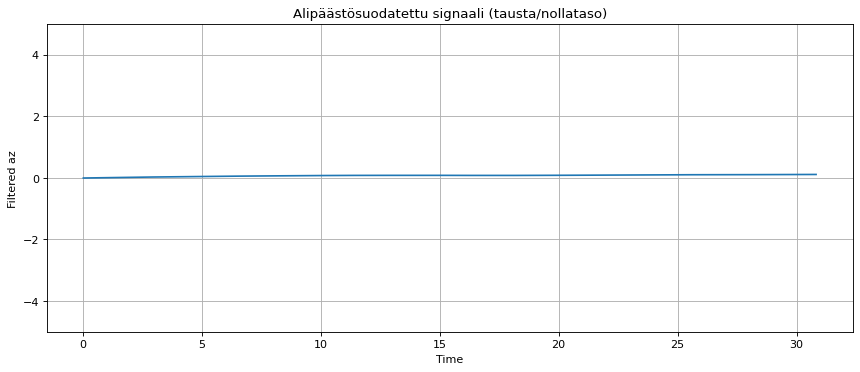

In [131]:
fig = plt.figure(num=None, figsize= (13,17), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3,1,3)
plt.plot(time_vect,lowpass_filtered)
plt.ylim(-5,5)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Filtered az')
plt.title('Alipäästösuodatettu signaali (tausta/nollataso)')

In [152]:
steps=0

for i in range(len(az) - 1):
    if az[i] / az[i + 1] < 0:
        steps =+ 0.5

print("Askeleet", steps)


Askeleet 0.5


In [134]:
from scipy.signal import find_peaks


In [135]:
peaks, _ = find_peaks(df_f, height=0)

In [137]:
num_steps = len(peaks)
print("Number of steps:", num_steps)

Number of steps: 33


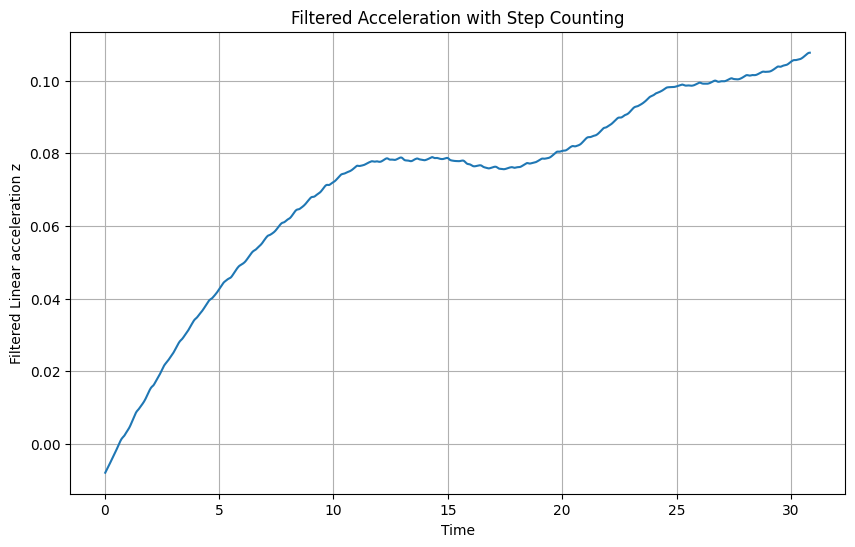

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df_f)
plt.xlabel('Time')
plt.ylabel('Filtered Linear acceleration z')
plt.title('Filtered Acceleration with Step Counting')
plt.grid(True)
plt.show()